# DMP Final Project - Chicago Car Crashes
## Group 5
## 4 February 2024
## Car Crash Data EDA

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data from csv

#df = pd.read_csv('Traffic_Crashes_-_Crashes_20240204.csv',header='infer')
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv',header='infer')

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
df.shape

(794956, 48)

In [5]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [6]:
# Change CRASH_DATE to a datetime format so we can filter by year
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Filter for crashes that happened in 2023
year_2023 = df[df['CRASH_DATE'].dt.year == 2023]
year_2023.shape

(110560, 48)

In [7]:
# See how many crashes occurred each year
df['CRASH_DATE'].dt.year.value_counts()

CRASH_DATE
2018    118950
2019    117762
2023    110560
2021    108763
2022    108401
2020     92092
2017     83786
2016     44297
2015      9829
2024       508
2014         6
2013         2
Name: count, dtype: int64

In [8]:
# Number of fatal injuries in 2023
year_2023['INJURIES_FATAL'].sum()

148.0

In [9]:
# Number of total injuries in 2023
year_2023['INJURIES_TOTAL'].sum()

23425.0

In [10]:
# See how much in damages from 2023 crashes

# Define conditions
conditions = [
    df['DAMAGE'] == 'Over $1,500',  # First condition
    df['DAMAGE'] == '$501 - $1,500', # Second condition
    df['DAMAGE'] == '$500 OR LESS'
]

# Define choices corresponding to the conditions
choices = [
    1500,  # Choice for the first condition
    500,    # Choice for the second condition
    0
]

df['DAMAGE_VALUE'] = np.select(conditions, choices, default=0)


In [11]:
#error
# Filter for crashes that happened in 2023
year_2023 = df[df['CRASH_DATE'].dt.year == 2023]
year_2023.shape

year_2023['DAMAGE_VALUE'].head(20)

0       0
1       0
2       0
3       0
4       0
6     500
10    500
12      0
13      0
14      0
15      0
18    500
19      0
20      0
27      0
28      0
35      0
36      0
37      0
38    500
Name: DAMAGE_VALUE, dtype: int64

In [12]:
#error
year_2023['DAMAGE_VALUE'].sum()

11600500

In [13]:
##END MELODY'S EDA PORTION##

In [14]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [15]:
#pip install missingno

In [17]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [18]:
import missingno as msno

<Axes: >

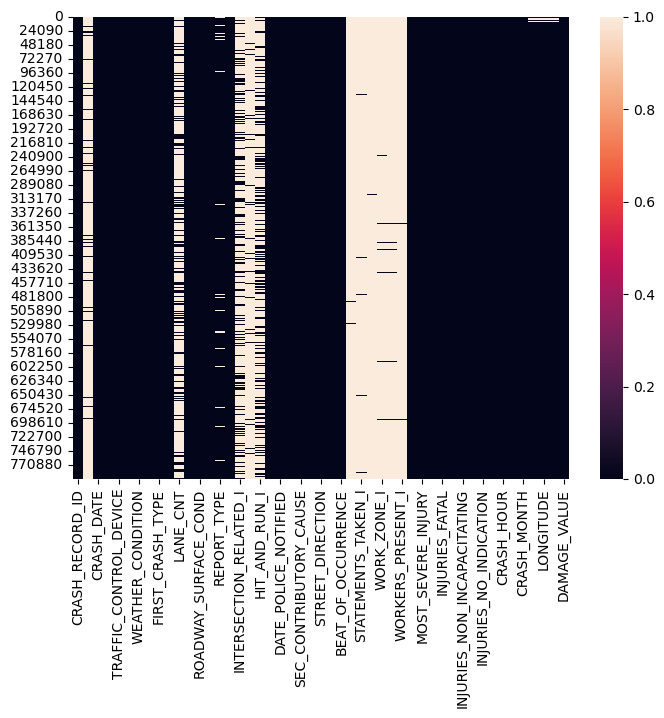

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

<Axes: >

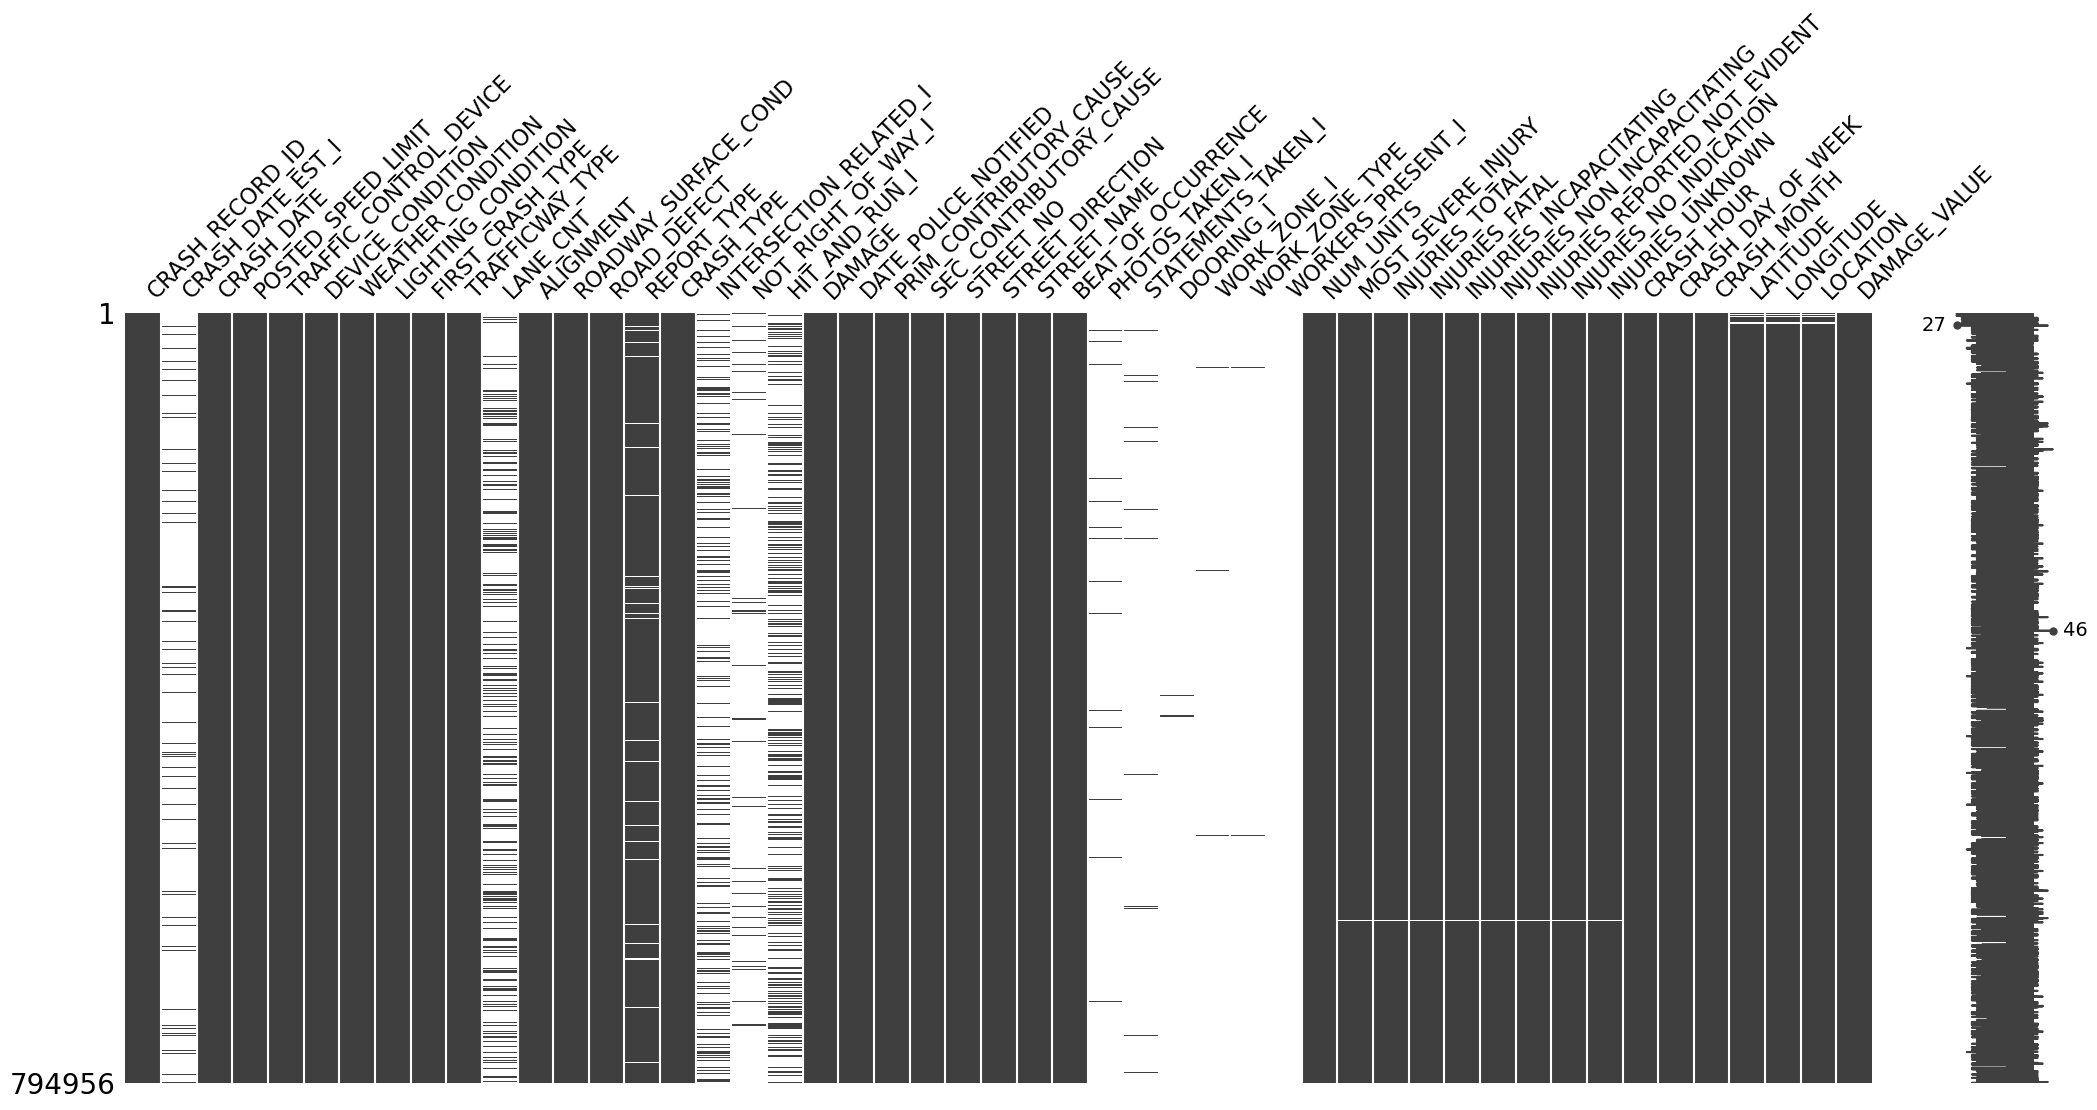

In [20]:
msno.matrix(df)

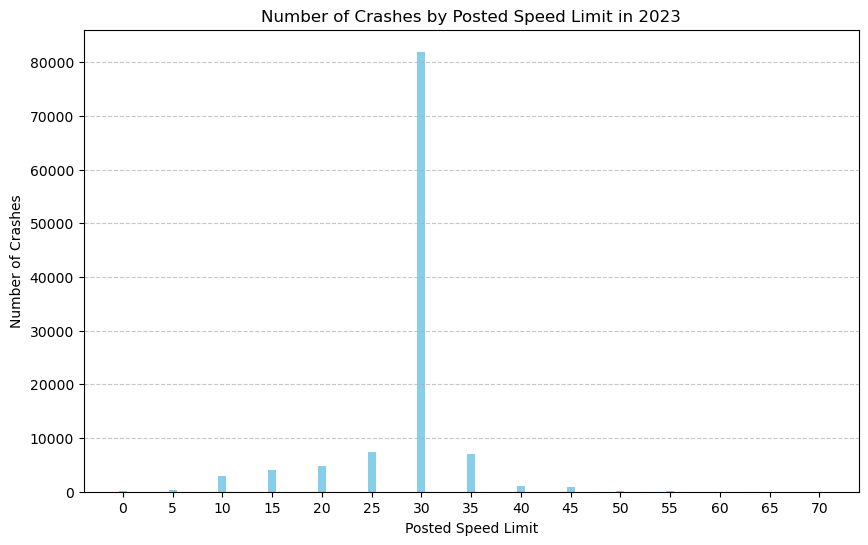

In [21]:
# Group data by 'POSTED_SPEED_LIMIT' and count occurrences of 'NUM_UNITS'
crash_counts = year_2023.groupby('POSTED_SPEED_LIMIT')['NUM_UNITS'].count()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(crash_counts.index, crash_counts.values, color='skyblue')
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Posted Speed Limit in 2023')
plt.xticks(np.arange(0, max(crash_counts.index) + 1, 5))  # Set x-axis ticks in increments of 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

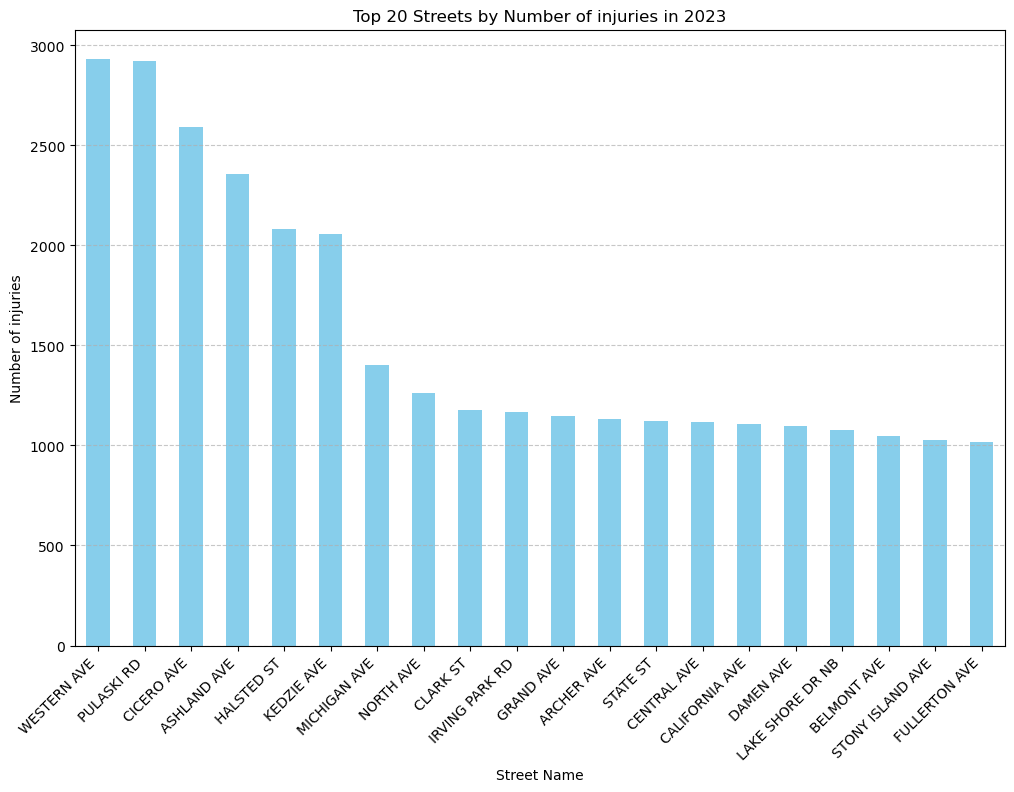

In [22]:
# Group data by 'STREET_NAME' and count occurrences of injuries
injury_counts = year_2023.groupby('STREET_NAME')['INJURIES_TOTAL'].count()

# Plot bar plot
plt.figure(figsize=(12, 8))
injury_counts.sort_values(ascending=False)[:20].plot(kind='bar', color='skyblue')
plt.xlabel('Street Name')
plt.ylabel('Number of injuries')
plt.title('Top 20 Streets by Number of injuries in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

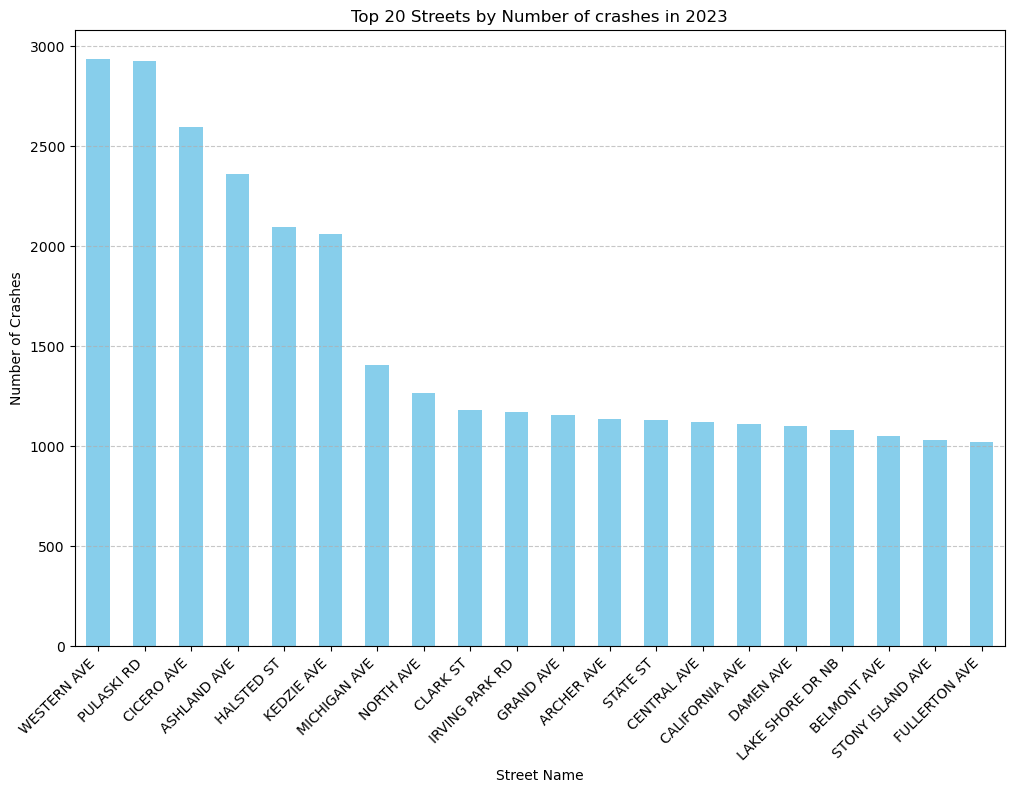

In [23]:
# Group data by 'STREET_NAME' and count occurrences of injuries
injury_counts = year_2023.groupby('STREET_NAME')['NUM_UNITS'].count()

# Plot bar plot
plt.figure(figsize=(12, 8))
injury_counts.sort_values(ascending=False)[:20].plot(kind='bar', color='skyblue')
plt.xlabel('Street Name')
plt.ylabel('Number of Crashes')
plt.title('Top 20 Streets by Number of crashes in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

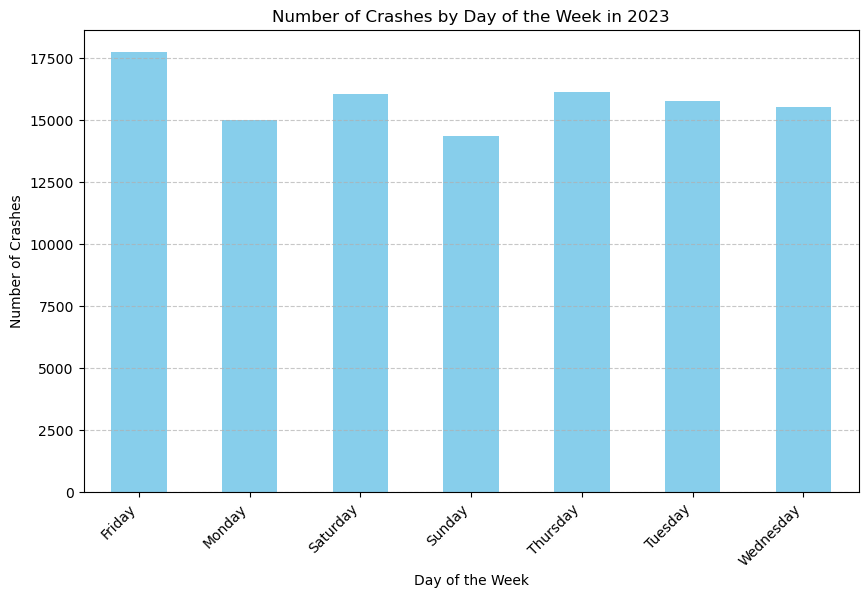

In [24]:
# Map numerical values to day of the week
day_mapping = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

# Group data by 'CRASH_DAY_OF_WEEK' and count occurrences of crashes
day_counts = year_2023.groupby('CRASH_DAY_OF_WEEK').size()

# Sort the data by day of the week
day_counts_sorted = day_counts.rename(day_mapping).sort_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
day_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of the Week in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

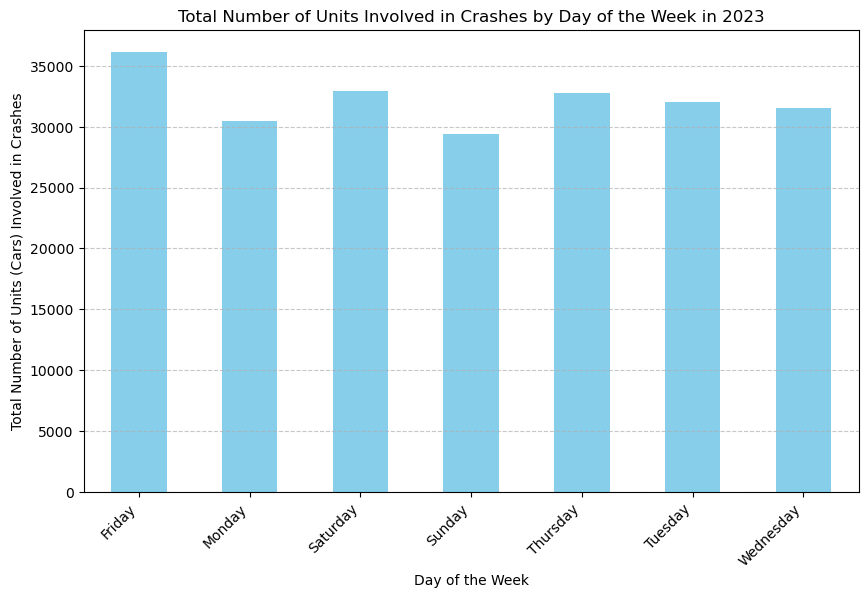

In [25]:
# Group data by 'CRASH_DAY_OF_WEEK' and sum the 'NUM_UNITS' column
day_units_sum = year_2023.groupby('CRASH_DAY_OF_WEEK')['NUM_UNITS'].sum()

# Sort the data by day of the week
day_units_sum_sorted = day_units_sum.rename(day_mapping).sort_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
day_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Day of the Week in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

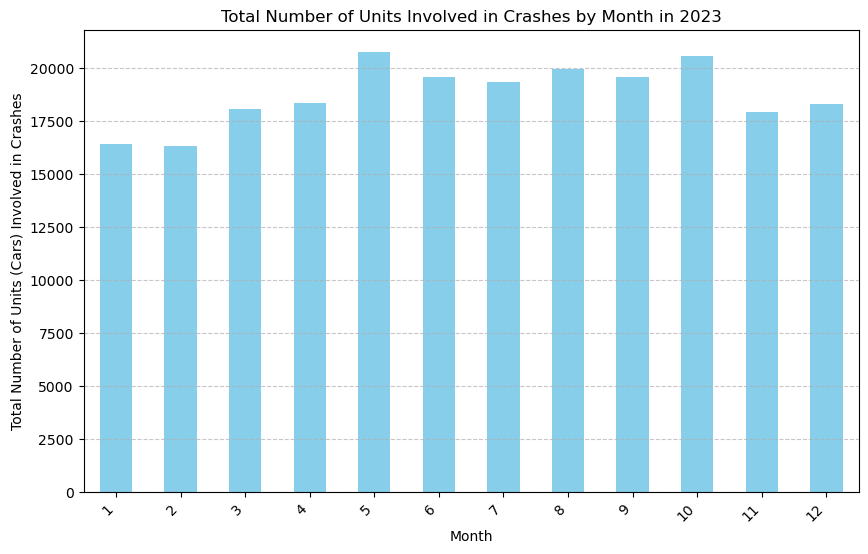

In [26]:
# Group data by 'CRASH_MONTH' and sum the 'NUM_UNITS' column
month_units_sum = year_2023.groupby('CRASH_MONTH')['NUM_UNITS'].sum()

# Sort the data by month
month_units_sum_sorted = month_units_sum.sort_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
month_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Month in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

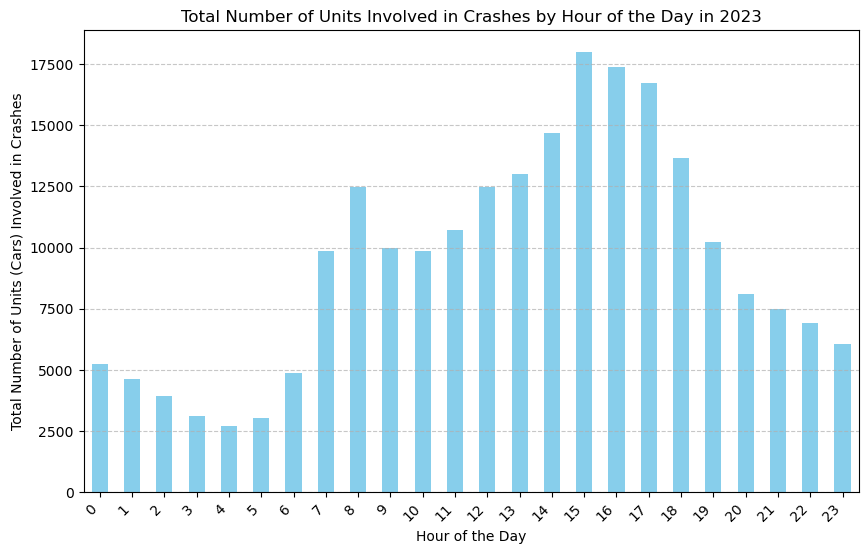

In [27]:
# Group data by 'CRASH_HOUR' and sum the 'NUM_UNITS' column
hour_units_sum = year_2023.groupby('CRASH_HOUR')['NUM_UNITS'].sum()

# Sort the data by hour
hour_units_sum_sorted = hour_units_sum.sort_index()

# Plot bar plot
plt.figure(figsize=(10, 6))
hour_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Hour of the Day in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

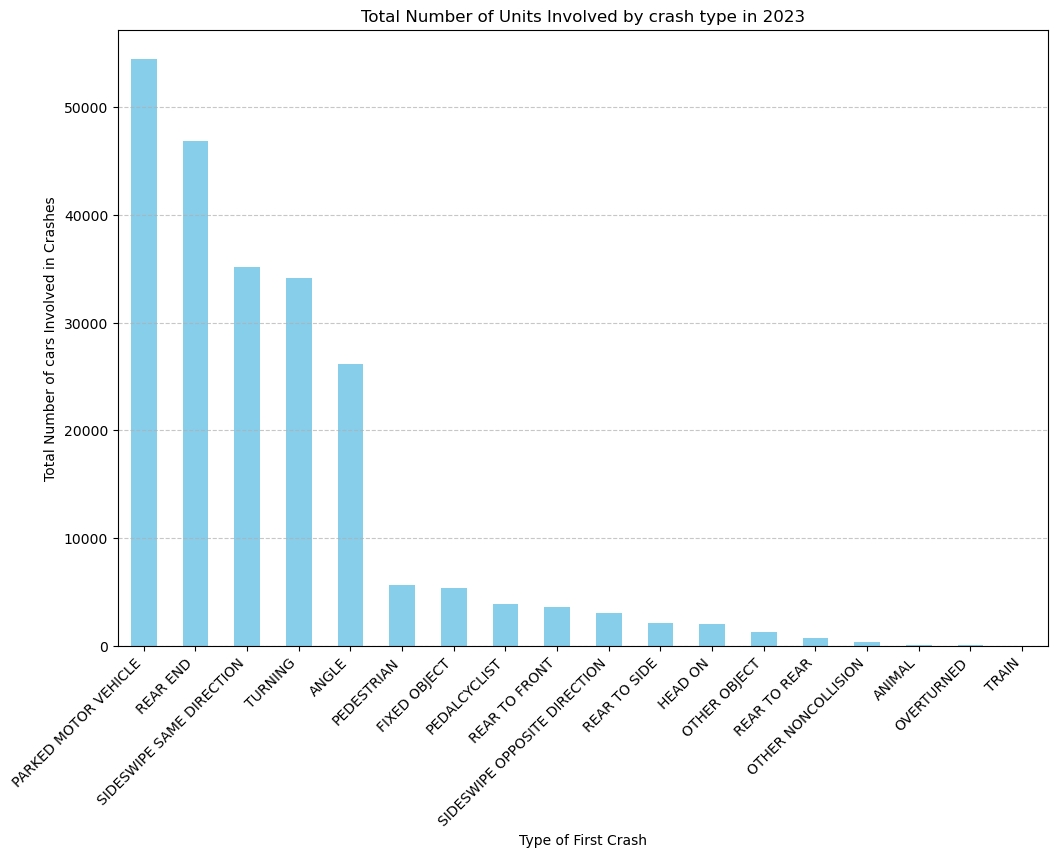

In [28]:
# Group data by 'FIRST_CRASH_TYPE' and sum the 'NUM_UNITS' column
crash_type_units_sum = year_2023.groupby('FIRST_CRASH_TYPE')['NUM_UNITS'].sum()

# Sort the data by total number of units involved in crashes
crash_type_units_sum_sorted = crash_type_units_sum.sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 8))
crash_type_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Type of First Crash')
plt.ylabel('Total Number of cars Involved in Crashes')
plt.title('Total Number of Units Involved by crash type in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

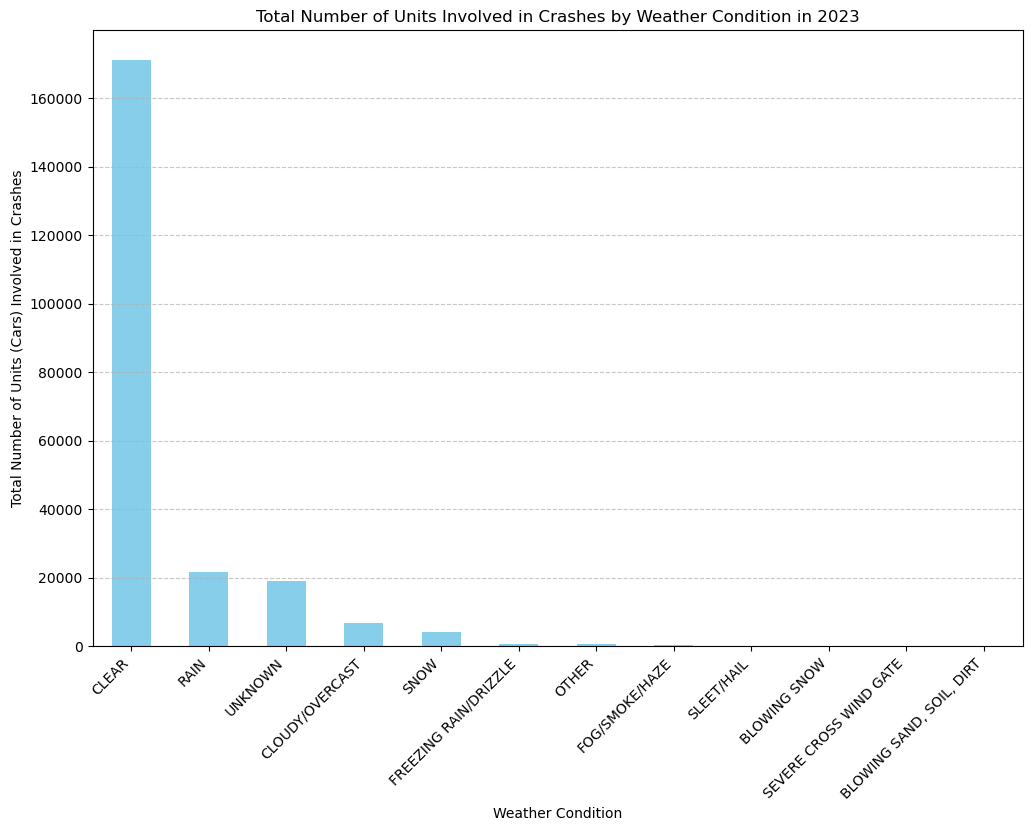

In [29]:
# Group data by 'WEATHER_CONDITION' and sum the 'NUM_UNITS' column
weather_units_sum = year_2023.groupby('WEATHER_CONDITION')['NUM_UNITS'].sum()

# Sort the data by total number of units involved in crashes
weather_units_sum_sorted = weather_units_sum.sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 8))
weather_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Weather Condition in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
# Group data by 'TRAFFICWAY_TYPE' and sum the 'NUM_UNITS' column
trafficway_units_sum = year_2023.groupby('TRAFFICWAY_TYPE')['NUM_UNITS'].sum()

# Sort the data by total number of units involved in crashes
trafficway_units_sum_sorted = trafficway_units_sum.sort_vbalues(ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 8))
trafficway_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Trafficway Type')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Trafficway Type in 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AttributeError: 'Series' object has no attribute 'sort_vbalues'

In [ ]:
# Group data by 'PRIM_CONTRIBUTORY_CAUSE' and sum the 'NUM_UNITS' column
cause_units_sum = year_2023.groupby('PRIM_CONTRIBUTORY_CAUSE')['NUM_UNITS'].sum()

# Sort the data by total number of units involved in crashes
cause_units_sum_sorted = cause_units_sum.sort_values(ascending=False)

# Plot bar plot
plt.figure(figsize=(12, 8))
cause_units_sum_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Primary Contributory Cause')
plt.ylabel('Total Number of Units (Cars) Involved in Crashes')
plt.title('Total Number of Units Involved in Crashes by Primary Contributory Cause in 2023')
plt.xticks(rotation=90, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#set target
#crashed_cars = year_2023['NUM_UNITS']

In [ ]:
#split off new df that is just the features
#killed all of the injury features due to collinearity? 
features = year_2023.drop(['CRASH_RECORD_ID','CRASH_DATE_EST_I','CRASH_DATE','REPORT_TYPE','CRASH_TYPE',
                           'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I','DAMAGE','DATE_POLICE_NOTIFIED',
                          'STREET_NO','STREET_DIRECTION','STREET_NAME','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I',
                          'WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','MOST_SEVERE_INJURY','INJURIES_TOTAL',
                          'INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT',
                          'INJURIES_NO_INDICATION','INJURIES_UNKNOWN','DAMAGE','LATITUDE', 'LONGITUDE', 'LOCATION','LANE_CNT'], axis=1)


#'CRASH_DATE': drop for now, but need to tie weather data in
#'LATITUDE', 'LONGITUDE', 'LOCATION': drop for now, but replace with zip code
#'NUM_UNITS': added this back in here, encode then re-drop?
#'LANE_CNT': had to drop due to # of nulls

In [ ]:
features.shape

(110560, 17)

In [ ]:
features.head(5)

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",STRAIGHT AND LEVEL,DRY,NO DEFECTS,UNABLE TO DETERMINE,NOT APPLICABLE,225.0,2,19,3,9
1,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,411.0,2,18,6,9
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",1235.0,4,14,7,7
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,1650.0,2,23,4,8
4,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,1654.0,2,12,6,8


In [ ]:
features.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH'],
      dtype='object')

In [ ]:
features.dropna(inplace=True)

In [ ]:
features.shape

(110560, 17)

In [ ]:
# Check for missing values in each column
missing_values_count = features.isnull().sum()

# Print columns with missing values and the count of missing values in each column
print("Columns with missing values:")
print(missing_values_count[missing_values_count > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
#features.to_csv('features_df.csv', index=False)

#NEED TO DO A SHITLOAD OF ONEHOT ENCODING OR LABEL ENCODING FOR CATEGORICAL VARIABLES

##summary
##all records
'CRASH_RECORD_ID', drop, id - irrelvant
'CRASH_DATE_EST_I', drop, usually blank
'CRASH_DATE', not sure, will use this field to tie in hourly weather data
'POSTED_SPEED_LIMIT', numerical, good to use?
'TRAFFIC_CONTROL_DEVICE', needs label encoding
'DEVICE_CONDITION', needs label encoding
'WEATHER_CONDITION', needs label encoding
'LIGHTING_CONDITION', needs label encoding
'FIRST_CRASH_TYPE',needs label encoding
'TRAFFICWAY_TYPE', needs label encoding
'LANE_CNT', numerical, but tons of data missing? 
'ALIGNMENT', needs label encoding
'ROADWAY_SURFACE_COND', needs label encoding
 'ROAD_DEFECT', needs label encoding
 'REPORT_TYPE', drop? don't care how it was reported
 'CRASH_TYPE', target, drop
 'INTERSECTION_RELATED_I', drop, redundant?
 'NOT_RIGHT_OF_WAY_I', drop, redundant?
 'HIT_AND_RUN_I', drop, irrelevant?
 'DAMAGE', target/response variable
 'DATE_POLICE_NOTIFIED', drop, irrelevant? 
 'PRIM_CONTRIBUTORY_CAUSE', categorical, needs label enconding
 'SEC_CONTRIBUTORY_CAUSE', categorical, needs label enconding
 'STREET_NO', i have no idea what do to with this (replace with zip code conversion)
 'STREET_DIRECTION', categorical, but appears to be uniquely labeled as-is? (replace with zip code conversion)
 'STREET_NAME', categorical, needs label enconding (replace with zip code conversion)
 'BEAT_OF_OCCURRENCE',categorical, but appears to be uniquely labeled as-is? 
 'PHOTOS_TAKEN_I', drop, irrelevant?
 'STATEMENTS_TAKEN_I', drop, irrelevant?
 'DOORING_I', drop, irrelevant?
 'WORK_ZONE_I', idk.. lots of N/A data
 'WORK_ZONE_TYPE', idk.. lots of N/A data
 'WORKERS_PRESENT_I', idk.. lots of N/A data
 'NUM_UNITS', target variable
 'MOST_SEVERE_INJURY', drop? alternate target variable
 'INJURIES_TOTAL', alternate target variable
 'INJURIES_FATAL', alternate target variable
 'INJURIES_INCAPACITATING', alternate target variable
 'INJURIES_NON_INCAPACITATING', alternate target variable
 'INJURIES_REPORTED_NOT_EVIDENT', drop?
 'INJURIES_NO_INDICATION', drop?
 'INJURIES_UNKNOWN', drop?
 'CRASH_HOUR', categorical, but appears to be uniquely labeled as-is? 
 'CRASH_DAY_OF_WEEK', categorical, but appears to be uniquely labeled as-is? 
 'CRASH_MONTH', categorical, but appears to be uniquely labeled as-is? 
 'LATITUDE', will we get this specific with location? - tie to zip code
 'LONGITUDE', will we get this specific with location? - tie to zip code
 'LOCATION', will we get this specific with location? combination of lat/long - tie to zip code
 'DAMAGE_VALUE'

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#select categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns
categorical_columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'],
      dtype='object')

In [ ]:
#initialize
encoder = OneHotEncoder(sparse=False, drop='first')

In [ ]:
# Perform one-hot encoding on categorical columns
encoded_features = pd.DataFrame(encoder.fit_transform(features[categorical_columns]),
                                columns=encoder.get_feature_names_out(categorical_columns))


C:\Users\natal\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_features.head(5)

,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,...,SEC_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,SEC_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,SEC_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,SEC_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,SEC_CONTRIBUTORY_CAUSE_TEXTING,SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
encoded_features.shape

(110560, 166)

In [ ]:
# Reset index of the DataFrame containing numerical features
numerical_features_reset_index = features.select_dtypes(exclude=['object']).reset_index(drop=True)

# Concatenate encoded features with numerical features
encoded_feat_df = pd.concat([encoded_features, numerical_features_reset_index], axis=1)

In [ ]:
#concatenate encoded features with numerical features
#encoded_feat_df = pd.concat([encoded_features, features.select_dtypes(exclude=['object'])], axis=1)
encoded_feat_df.head(10)

,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,...,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,225.0,2,19,3,9
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,50,411.0,2,18,6,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,1235.0,4,14,7,7
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30,1650.0,2,23,4,8
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15,1654.0,2,12,6,8
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,30,1652.0,2,17,2,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,30,1814.0,2,13,7,7
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,35,2221.0,2,13,1,8
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25,1655.0,2,16,5,9
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,30,232.0,2,0,1,8


In [ ]:
encoded_feat_df.shape

(110560, 172)

In [ ]:
# Check for missing values in each column
missing_values_count = encoded_feat_df.isnull().sum()

# Print columns with missing values and the count of missing values in each column
print("Columns with missing values:")
print(missing_values_count[missing_values_count > 0])

Columns with missing values:
Series([], dtype: int64)


In [ ]:
#encoded_feat_df.to_csv('encoded_feat_df_after_dropping.csv', index=False)

In [ ]:
##encoded_feat_df.dropna(inplace=True)

In [ ]:
##encoded_feat_df.shape

In [ ]:
#set target
crashed_cars = encoded_feat_df['NUM_UNITS']
crashed_cars.shape

(110560,)

In [ ]:
#re-drop target
encoded_feat_df = encoded_feat_df.drop(['NUM_UNITS'], axis=1)
encoded_feat_df.shape

(110560, 171)

In [ ]:
encoded_feat_df.head(5)

,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,...,SEC_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,SEC_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"SEC_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",SEC_CONTRIBUTORY_CAUSE_WEATHER,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,225.0,19,3,9
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,50,411.0,18,6,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,1235.0,14,7,7
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,30,1650.0,23,4,8
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15,1654.0,12,6,8


In [ ]:
from sklearn.model_selection import train_test_split
#shuffle then split into training vs. test at 70/30 split
# X=features, y=crashes
X_train, X_test, y_train, y_test = train_test_split(encoded_feat_df, crashed_cars, test_size=0.3, random_state = 0)

In [ ]:
X_train.shape

(77392, 171)

In [ ]:
y_train.shape

(77392,)

In [ ]:
X_test.shape

(33168, 171)

In [ ]:
y_test.shape

(33168,)

In [ ]:
from sklearn.linear_model import LinearRegression
#create linear regressor
lm = LinearRegression()
#train model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [ ]:
#borrowed professor's functions:

def _toArray(y):
    y = np.asarray(y)
    if len(y.shape) == 2 and y.shape[1] == 1:
        y = y.ravel()
    return y

def regressionSummary(y_true, y_pred):
    """ print regression performance metrics 
    Input:
        y_true: actual values
        y_pred: predicted values
    """
    y_true = _toArray(y_true)
    y_pred = _toArray(y_pred)
    y_res = y_true - y_pred
    metrics = [
        ('Mean Error (ME)', sum(y_res) / len(y_res)),
        ('Root Mean Squared Error (RMSE)', math.sqrt(mean_squared_error(y_true, y_pred))),
        ('Mean Absolute Error (MAE)', sum(abs(y_res)) / len(y_res)),
    ]
    if all(yt != 0 for yt in y_true):
        metrics.extend([
            ('Mean Percentage Error (MPE)', 100 * sum(y_res / y_true) / len(y_res)),
            ('Mean Absolute Percentage Error (MAPE)', 100 * sum(abs(y_res / y_true) / len(y_res))),
        ])
    fmt1 = '{{:>{}}} : {{:.4f}}'.format(max(len(m[0]) for m in metrics))
    print('\nRegression statistics\n')
    for metric, value in metrics:
        print(fmt1.format(metric, value))     

In [ ]:
def adjusted_r2_score(y_true, y_pred, model):
    """ calculate adjusted R2
    Input:
        y_true: actual values
        y_pred: predicted values
        model: predictive model
    """
    n = len(y_pred)
    p = len(model.coef_)
    if p >= n - 1:
        return 0
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
adjusted_r2_score(y_test, y_pred, lm)

0.27000247894696205

In [ ]:
#mse
mse = mean_squared_error(y_test,y_pred)
mse

0.1605107830500763

In [ ]:
#r2
r2 = lm.score(X_test, y_test)
r2

0.27376614693321555

In [ ]:
#adjusted r2 for test data set
#draws on r2 set using test data
n = len(y_test)
#12 features
p = X_test.shape[1]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
adj_r2

0.27000247894696205

In [ ]:
# Get the coefficients and corresponding feature names
coefficients = lm.coef_
feature_names = X_train.columns

# Create a DataFrame to display coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude
coefficients_df_sorted = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the sorted coefficients DataFrame
print(coefficients_df_sorted)

                                               Feature   Coefficient
41                       FIRST_CRASH_TYPE_FIXED OBJECT -1.034350e+00
45                         FIRST_CRASH_TYPE_OVERTURNED -1.018032e+00
40                             FIRST_CRASH_TYPE_ANIMAL -9.748437e-01
43                 FIRST_CRASH_TYPE_OTHER NONCOLLISION -9.382960e-01
44                       FIRST_CRASH_TYPE_OTHER OBJECT -9.057171e-01
..                                                 ...           ...
36                             LIGHTING_CONDITION_DAWN -4.161521e-04
170                                        CRASH_MONTH  2.921771e-04
169                                  CRASH_DAY_OF_WEEK -1.587586e-04
167                                 BEAT_OF_OCCURRENCE  3.221708e-06
115  PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING L... -3.025358e-15

[171 rows x 2 columns]


In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
#simple example of label encoder
from sklearn.preprocessing import LabelEncoder
feedback = ['poor','fair','good','very good','excellent']
encoder = LabelEncoder()
encoded_feedback = encoder.fit_transform(feedback)
feedback_mapping = dict(zip(feedback, encoded_feedback))
encoded_feedback
feedback_mapping